This notebook was primarily run on Google colab and the paths will need to be updated if run on another platform. In addition, the AllDataset2( all images in a single folder), train_dataset.csv and test_dataset.csv are required to run the notebook. The notebook was adapted from the implementation in https://github.com/raoofnaushad/EuroSAT_LULC

# Installation

In [1]:
# compression tools
!pip install Wand
!sudo apt-get install imagemagick
!python -c "from wand.version import VERSION; print(f'Wand version {VERSION}')"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 kB 1.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libgs9 libgs9-common libidn11 libijs-0.35 libjbig2dec0 liblqr-1-0
  libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra libmagickwand-6.q16-6
  libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch inkscape libjxr-tools libwmf0.2-7-gtk
  poppler-uti

# Imports

In [2]:
# import the required packages
import torch
import argparse
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

from torchvision.utils import save_image

from torchvision.utils import make_grid

from torch.utils.tensorboard import SummaryWriter
import datetime
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.tensorboard import SummaryWriter
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from tqdm.notebook import tqdm
import seaborn as sns
import random
from tqdm import tqdm


from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split


import torch
import torchvision.models as models
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.transforms import transforms
from torchvision.utils import make_grid
import torch.nn.functional as F

from torchsummary import summary
import glob 
import shutil
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


import matplotlib
matplotlib.rcParams['axes.grid'] = False

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device
# batch_size = 16

device(type='cuda')

# Data loading


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
!ls $dest | wc -l

3


In [7]:
# Run once
# Make a sample folder with just 10 images
!mkdir /content/copyDataset

In [8]:
# Run once
!mkdir /content/drive/MyDrive/sampleGrayScale

In [7]:
!unzip /content/drive/MyDrive/AllDataset2-20230417T104432Z-001.zip

Archive:  /content/drive/MyDrive/AllDataset2-20230417T104432Z-001.zip
  inflating: AllDataset2/cattle_9798_DSCF8580.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8543.jpg  
  inflating: AllDataset2/cattle_9801_DSCF8593.jpg  
  inflating: AllDataset2/cattle_9801_DSCF8587.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8564.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8573.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8561.jpg  
  inflating: AllDataset2/cattle_9801_DSCF8591.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8560.jpg  
  inflating: AllDataset2/cattle_9801_DSCF8589.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8571.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8540.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8569.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8568.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8567.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8570.jpg  
  inflating: AllDataset2/cattle_9798_DSCF8572.jpg  
  inflating: AllDataset2/cattle_9801_DSCF8586.

In [9]:
!ls /content/AllDataset2

cattle_0100_DSCF3856.jpg  cattle_4775_DSCF6745.jpg  cattle_5581_DSCF9541.jpg
cattle_0100_DSCF3858.jpg  cattle_4775_DSCF6746.jpg  cattle_5581_DSCF9542.jpg
cattle_0100_DSCF3859.jpg  cattle_4775_DSCF6747.jpg  cattle_5581_DSCF9543.jpg
cattle_0100_DSCF3860.jpg  cattle_4775_DSCF6748.jpg  cattle_5581_DSCF9544.jpg
cattle_0100_DSCF3861.jpg  cattle_4775_DSCF6749.jpg  cattle_5581_DSCF9545.jpg
cattle_0100_DSCF3862.jpg  cattle_4776_DSCF0586.jpg  cattle_5581_DSCF9546.jpg
cattle_0100_DSCF3865.jpg  cattle_4776_DSCF0587.jpg  cattle_5581_DSCF9547.jpg
cattle_0100_DSCF3866.jpg  cattle_4776_DSCF0588.jpg  cattle_5581_DSCF9548.jpg
cattle_0200_DJI_0115.jpg  cattle_4776_DSCF0589.jpg  cattle_5581_DSCF9549.jpg
cattle_0200_DJI_0116.jpg  cattle_4776_DSCF0590.jpg  cattle_5581_DSCF9550.jpg
cattle_0200_DJI_0119.jpg  cattle_4776_DSCF0591.jpg  cattle_5604_DSCF6925.jpg
cattle_0200_DSCF3868.jpg  cattle_4776_DSCF0592.jpg  cattle_5604_DSCF6926.jpg
cattle_0200_DSCF3870.jpg  cattle_4776_DSCF0593.jpg  cattle_5604_DSCF6927.jpg

In [10]:
# Generate sample indexes to select from the dataset
len_ds = !ls /content/AllDataset2 | wc -l
len_ds = int(len_ds[0])

n = 10
copy_ds = np.random.randint(0, len_ds-1, size=n)
copy_ds

array([4272,  253, 3262, 2545, 3748, 2604, 4149, 3644, 2377, 4642])

In [11]:
# #Copy some images from the alldataset to the copydataset

# Source directory
src = "/content/AllDataset2/" #/content/drive/MyDrive/AllDataset/"

# Destination directory
dst = "/content/copyDataset/"


# Get list of files in source directory
files = os.listdir(src)

# Copy 10 files from source to destination
for i in copy_ds:
    shutil.copy(src+files[i], dst)

In [ ]:
# !mkdir "/content/drive/MyDrive/processedDataset/"

# Image compression

In [ ]:
# remove existing compressed images
# !rm -rf "/content/drive/MyDrive/AllDatasetCompressed/"

In [12]:
# Run once
!mkdir "/content/AllDatasetCompressed/"

In [13]:
!mkdir "/content/CompressedCopy/"

In [14]:
src = "/content/AllDataset2" #/content/drive/MyDrive/AllDataset"
dest = "/content/AllDatasetCompressed/"

# sample
sample_src = "/content/copyDataset"
sample_dest = "/content/CompressedCopy/"

In [15]:
def file_size(_file):
    # Get size of file in bytes
    size_in_bytes = os.path.getsize(_file)

    # Convert size to kilobytes
    size_in_kilobytes = size_in_bytes / 1024

    # Print size of file
    return "{:.2f} KB".format(size_in_kilobytes)

### Using Pillow library

In [16]:
from PIL import Image

def pill_compress(src, dest, format, quality, sample=False):
    """
        Go through the directory given and for each file open it with pillow and
        save it at the quality provided. Later save the image to the destination
        directory
    """
    for path, subdirs, files in os.walk(src):
        for name in files:
            filename = os.path.join(path, name)

            if filename.endswith('.txt'):
                continue

            img = Image.open(filename)
            new_img = f'{dest}{name}'
            img.save(new_img, format=format, optimize=True, quality=quality)

            # print(sample)

            if sample:
                print(f'{file_size(filename)} -> {file_size(new_img)}\n')
                f_img = cv2.imread(filename)
                cv2_imshow(cv2.resize(f_img, (300,300)))

                n_img = cv2.imread(new_img)
                cv2_imshow(cv2.resize(n_img, (300,300)))

7.25 KB -> 1.04 KB



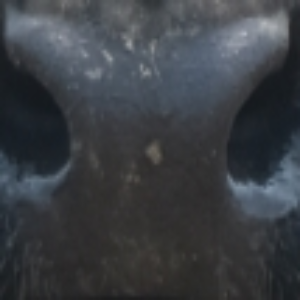

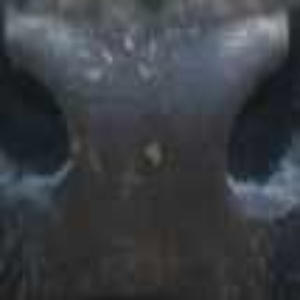

5.92 KB -> 1.02 KB



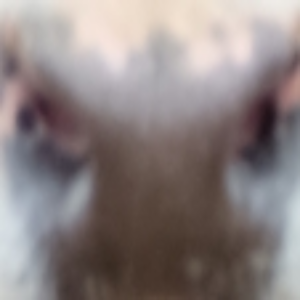

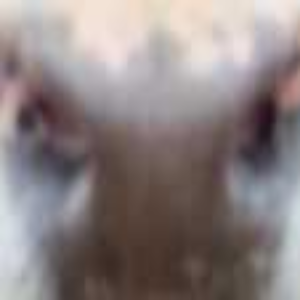

74.20 KB -> 12.40 KB



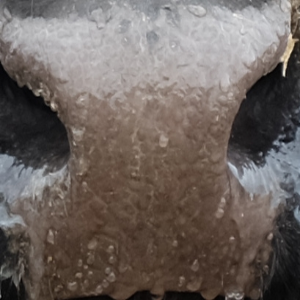

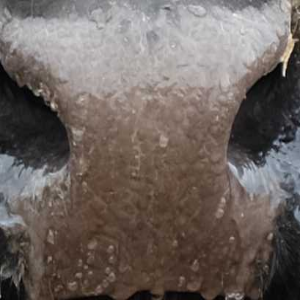

59.46 KB -> 8.79 KB



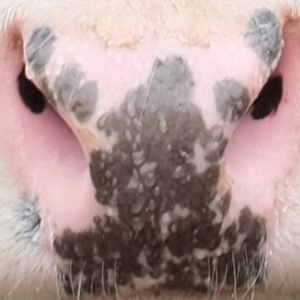

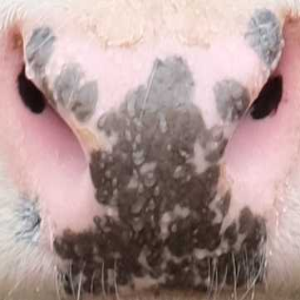

15.43 KB -> 2.32 KB



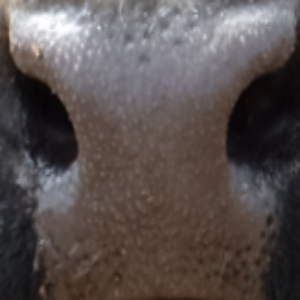

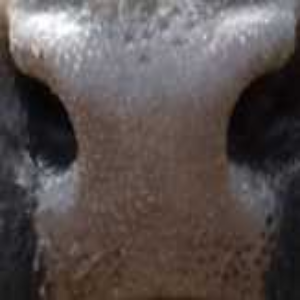

85.51 KB -> 14.13 KB



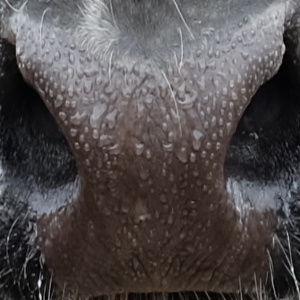

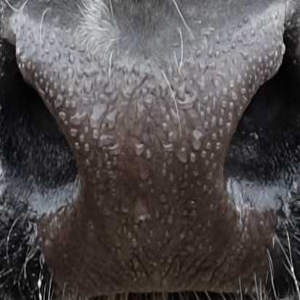

22.38 KB -> 3.03 KB



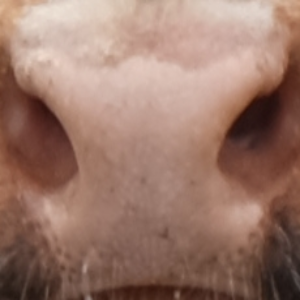

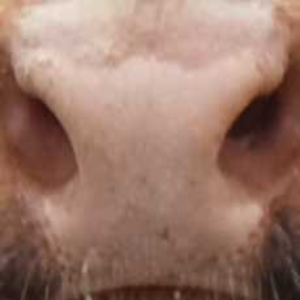

1096.01 KB -> 137.81 KB



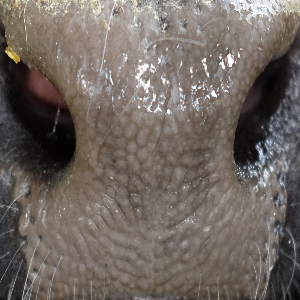

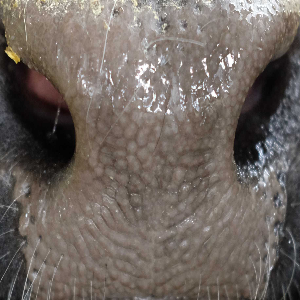

79.53 KB -> 10.80 KB



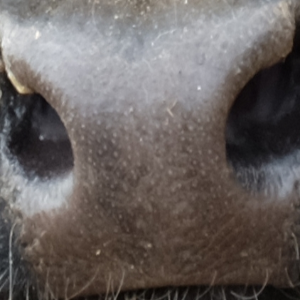

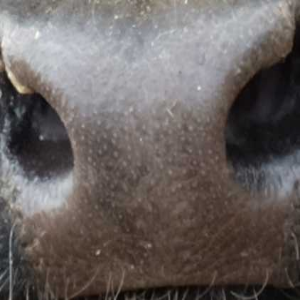

113.28 KB -> 16.88 KB



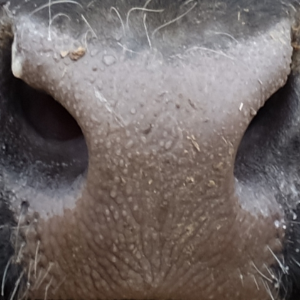

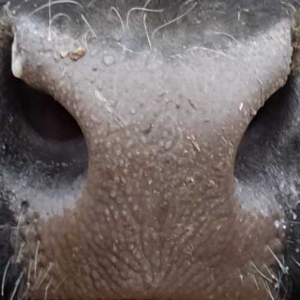

In [17]:
# sample image compression using default image format jpg
pill_compress(sample_src, sample_dest, "jpeg", 50, sample = True)

### JPEG compression

In [18]:
# run once

%%time
# Compress all images
pill_compress(src, dest, "jpeg", 25)

CPU times: user 1min, sys: 2.85 s, total: 1min 3s
Wall time: 1min 2s


In [19]:
dest

'/content/AllDatasetCompressed/'

In [20]:
!ls $dest | wc -l

4923


### Confirm transfer

In [22]:
!ls /content/AllDataset2/ | wc -l

4923


In [23]:
! ls /content/drive/MyDrive/CombinedDataset/ | wc -l

ls: cannot access '/content/drive/MyDrive/CombinedDataset/': No such file or directory
0


In [24]:
# dest = "/content/AllDataset2"
dest = "/content/AllDatasetCompressed/"

In [25]:
!ls $dest | wc -l

4923


In [26]:
!du -hs $dest

55M	/content/AllDatasetCompressed/


In [27]:
print(len(os.listdir(dest)))

4923


The train test split has been previously done, and extracted to a csv file. These csv files are read for both the train and test dataset. 

In [28]:
root_path = "/content/drive/MyDrive/datasplit_biometrics"
train_csv = os.path.join(root_path, 'train_dataset.csv')
train_df = pd.read_csv(train_csv) # todo; already existing

train_df.head()

,image_id,label
0,cattle_5774_DSCF6685.jpg,5774
1,cattle_5325_DSCF8207.jpg,5325
2,cattle_6294_DSCF9250.jpg,6294
3,cattle_9736_DSCF8524.jpg,9736
4,cattle_0600_DJI_0143.jpg,600


In [29]:
train_df.shape[0]

3565

In [30]:
#If label is 700, correct to 0700
def correct_label(label):
  if len(str(label)) == 3:
    return "0" + str(label)
  else:
    return str(label)

In [31]:
train_df["label"] = train_df["label"].apply(correct_label)

In [32]:
train_csv

'/content/drive/MyDrive/datasplit_biometrics/train_dataset.csv'

In [33]:
#the train_df stores the filenames and their labels
train_df.image_id.iloc[0]

'cattle_5774_DSCF6685.jpg'

In [34]:
#Load the csv file for the train and test data. The path of your test dataset needs to be updated.
root_path = "/content/drive/MyDrive/datasplit_biometrics"
test_csv = os.path.join(root_path, 'test_dataset.csv')
test_df = pd.read_csv(test_csv) 

test_df.head()

,image_id,label
0,cattle_5717_DSCF7510.jpg,5717
1,cattle_5360_DSCF0477.jpg,5360
2,cattle_6161_DSCF7349.jpg,6161
3,cattle_4456_DSCF1387.jpg,4456
4,cattle_4499_DSCF1223.jpg,4499


In [35]:
#Apply this to the dataframe
test_df["label"] = test_df["label"].apply(correct_label)

In [36]:
test_df

,image_id,label
0,cattle_5717_DSCF7510.jpg,5717
1,cattle_5360_DSCF0477.jpg,5360
2,cattle_6161_DSCF7349.jpg,6161
3,cattle_4456_DSCF1387.jpg,4456
4,cattle_4499_DSCF1223.jpg,4499
...,...,...
1353,cattle_6313_DSCF8780.jpg,6313
1354,cattle_6505_DSCF6991.jpg,6505
1355,cattle_5407_DSCF1037.jpg,5407
1356,cattle_6333_DSCF8761.jpg,6333


In [37]:
#We check if all labels are represented in the train data frist
train_unique_labels = train_df.label.unique()
len(train_unique_labels)  #This should return 268 which is the number of unique cattles a variant of images for a cattle should be represented in the training data

268

In [39]:
#Confirm that all files are included
assert train_df.shape[0] + test_df.shape[0] == 4923

In [40]:
# concatenate the two dataframes vertically
df = pd.concat([train_df, test_df])

# print the resulting concatenated dataframe
df

,image_id,label
0,cattle_5774_DSCF6685.jpg,5774
1,cattle_5325_DSCF8207.jpg,5325
2,cattle_6294_DSCF9250.jpg,6294
3,cattle_9736_DSCF8524.jpg,9736
4,cattle_0600_DJI_0143.jpg,0600
...,...,...
1353,cattle_6313_DSCF8780.jpg,6313
1354,cattle_6505_DSCF6991.jpg,6505
1355,cattle_5407_DSCF1037.jpg,5407
1356,cattle_6333_DSCF8761.jpg,6333


In [41]:
#To perform a sort of encoding. Idx is from 1 to num_classes, class is as extracted from the dataset
idx_class_labels = {}
for ind, cattle in enumerate(df.label.unique()):
  # print(ind+1, ":", cattle)
  idx_class_labels[ind] = str(cattle)

class_idx_labels = {str(value): key for key, value in idx_class_labels.items()}

#Confirm that all labels present in all dataset is also present in train. Throws an error if this is not the case 
assert len(class_idx_labels) == len(train_unique_labels)

In [80]:
class_idx_labels;

In [43]:
class_idx_labels["0700"]

191

In [44]:
#How the classes are extracted
each_file = "cattle_0200_DSCF3871.jpg"
each_file.split('_')[1]

'0200'

In [46]:
idx_class_labels;

In [47]:
class_idx_labels;

In [49]:
## Give idx of each class name
def encode_label(label):
    idx = class_idx_labels[str(label)] 
    return idx

## Take in idx and return the class name
def decode_target(target, text_labels=True):
    result = []
    if text_labels:
        return idx_class_labels[target]
    else:
        return target

## Show batches of images
def show_batch(dl):
    for images, labels in dl:
        # print(images)
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        # print(labels)
        break

In [50]:
print(encode_label("4679"))
print(decode_target(112))

123
5297


In [51]:
train_df = train_df.sample(frac = 1, random_state=48)
test_df = test_df.sample(frac = 1, random_state=48)

In [52]:
len(train_df)

3565

In [53]:
len(test_df)

1358

In [54]:
len(train_df) + len(test_df)

4923

In [55]:
train_df
train_df.reset_index(inplace = True) 
train_df.head()

,index,image_id,label
0,2321,cattle_3852_DSCF1591.jpg,3852
1,207,cattle_5403_DSCF0201.jpg,5403
2,2983,cattle_6530_DSCF7007.jpg,6530
3,2938,cattle_9742_DSCF8531.jpg,9742
4,34,cattle_2300_DSCF8864.jpg,2300


In [56]:
train_df["label"].iloc[0]

'3852'

In [57]:
test_df.reset_index(inplace = True) 
test_df.head()

,index,image_id,label
0,395,cattle_6294_DSCF9255.jpg,6294
1,328,cattle_5537_DSCF0531.jpg,5537
2,95,cattle_5325_DSCF8213.jpg,5325
3,1108,cattle_1800_DSCF7549.jpg,1800
4,1060,cattle_4951_DSCF9001.jpg,4951


# Dataset and Dataloaders

In [58]:
class Biometrics(Dataset):
    def __init__(self, df, dirc, transform=None):
        self.train_dir = dirc
        self.train_df = df
        self.transform = transform
        
    def __len__(self):
        return len(self.train_df)
    
    def __getitem__(self, idx):
        row = self.train_df.loc[idx]
        img_id, label = row['image_id'], row['label']
        img = Image.open(os.path.join(self.train_dir, img_id))
        # img = np.asarray(img)
        if self.transform:
            img = self.transform(img)

        #i.e when number is 3 digits, add 0 in front
        if len(str(label)) == 3:
          label = "0" + str(label)
        return img, encode_label(label)

5

# Data augmentations

In [61]:
dest

'/content/AllDatasetCompressed/'

In [60]:
# ## Dataset and transformations
train_data_transform = transforms.Compose([
                                transforms.Resize(size=(300, 300)),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0),
                                transforms.RandomRotation(20),
                                transforms.GaussianBlur(kernel_size=(5,5), sigma=(0.1, 2.0)),
                                transforms.ToTensor(),
                                ])

test_data_transform = transforms.Compose([
                                transforms.Resize(size=(300, 300)),
                                transforms.ToTensor(),
                                ])

In [ ]:
# horizontal flipping, brightness modification, randomized rotation, and blurring

In [62]:
train_ds = Biometrics(train_df, dest, train_data_transform)
test_ds = Biometrics(test_df, dest, test_data_transform)
print(len(train_ds), len(test_ds))

3565 1358


In [63]:
dest

'/content/AllDatasetCompressed/'

If the cell below runs, everything looks fine

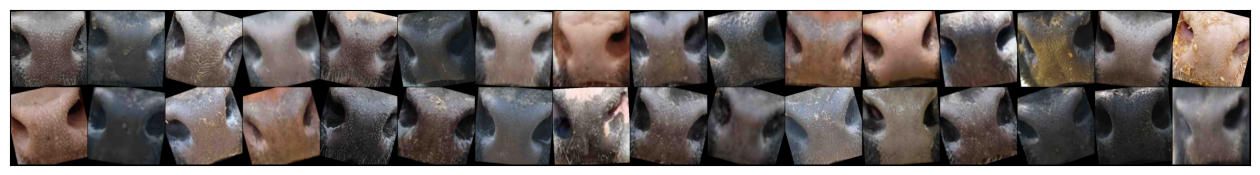

In [64]:
batch_size = 32
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size, shuffle=False, num_workers=2, pin_memory=True)
show_batch(train_dl)
#The images shown here are not preprocessed
#Images are black if normalized

In [65]:
class_idx_labels["5009"]

110

In [66]:
#To get the number of classes
num_classes = len(class_idx_labels)

In [67]:
num_classes

268

# Model

In [68]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.sum(preds==labels).item() / len(preds))

class MulticlassClassifierBase(nn.Module):
    def training_step(self, batch):
        img, label = batch
        out = self(img)
        loss = criterion(out, label)
        accu = accuracy(out, label)
        return accu ,loss

    def validation_step(self, batch):
        img, label = batch
        out = self(img)
        loss = criterion(out, label)
        accu = accuracy(out, label)
        return {"val_loss": loss.detach(), "val_acc": accu}
    
    def validation_epoch_ends(self, outputs):
        batch_loss = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_loss).mean()
        batch_acc = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {"val_loss":epoch_loss.item(), "val_acc":epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}],train_accu: {:.4f}, learning_rate: {:.4f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch,result['train_accu'], result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [69]:
num_classes

268

In [70]:
class AnimalBiometrics_Model(MulticlassClassifierBase):
    def __init__(self):
        super().__init__()
        self.network = models.vgg16(pretrained=True)
        n_inputs = self.network.classifier[6].in_features
        self.network.classifier[6] = nn.Sequential(
                                      nn.Linear(n_inputs, 256),
                                      nn.ReLU(),
                                      nn.Dropout(0.5),
                                      nn.Linear(256, num_classes),
                                      nn.LogSoftmax(dim=1)
                                        )
    def forward(self, xb):
        return self.network(xb)
    
    def freeze(self):
        for param in self.network.parameters():
            param.require_grad=False
        for param in self.network.classifier[6].parameters():
            param.require_grad=True
    def unfreeze(self):
        for param in self.network.parameters():
            param.require_grad=True

In [71]:
model = AnimalBiometrics_Model()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:01<00:00, 348MB/s]


In [72]:
## Running through the data loader => Model => Output
def try_batch(dl):
    for images, labels in dl:
        # print(images[0])  
        print(images.shape)
        out = model(images)
        print(out.shape)
        print(out[0])
        print(labels)
        break
        
try_batch(train_dl)

torch.Size([32, 3, 300, 300])
torch.Size([32, 268])
tensor([-5.7593, -5.8011, -5.4779, -5.5771, -5.5330, -5.4241, -5.9531, -5.5855,
        -5.4023, -5.4751, -5.5712, -5.8960, -5.5955, -5.7946, -5.2879, -5.4328,
        -5.4129, -5.3695, -5.3954, -5.4973, -5.3812, -5.4145, -5.7229, -5.5360,
        -5.6639, -5.5577, -5.5193, -5.5303, -5.6800, -5.4886, -5.5672, -5.6120,
        -5.6954, -5.5506, -5.3966, -5.6234, -5.7218, -5.6424, -5.7073, -5.8672,
        -5.6385, -5.5148, -5.7252, -5.7895, -5.6035, -5.4911, -5.5272, -5.5299,
        -5.7556, -5.6179, -5.6307, -5.6334, -5.4798, -5.5338, -5.4636, -5.6958,
        -5.4559, -5.6044, -5.5112, -5.4563, -5.3119, -5.6711, -5.6158, -5.3720,
        -5.6400, -5.7882, -5.6565, -5.4956, -5.3599, -5.4869, -5.4962, -5.7381,
        -5.6299, -5.8561, -5.5360, -5.4781, -5.5065, -5.3307, -5.1857, -5.7881,
        -5.7950, -5.6234, -5.8001, -5.9419, -5.5112, -5.5734, -5.6605, -5.8411,
        -6.0238, -5.6916, -5.7142, -5.6687, -5.6204, -5.5182, -5.587

The current challenge is that the out is very off with negative values

# Training and Evaluation

In [73]:
@torch.no_grad()
def evaluate(model, valid_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in valid_loader]
    return model.validation_epoch_ends(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    
def fit(epochs, max_lr,  model, train_loader, valid_loader, weight_decay=0,\
                grad_clip=None,opt_func=torch.optim.SGD, max_epochs_stop=3):
  
    history = []
    valid_loss_min = np.Inf
    valid_acc_max = 0
    model_file_name = 'abc.pth'
    model_file_name2 = 'abc_max_acc.pth'
    epochs_no_improve =  0
    optimizer = opt_func(model.parameters(), lr=max_lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.1)
                         
    for epoch in range(epochs):
        model.train()
        train_loss = []
        train_accu = []
        lrs = []
        for batch in tqdm(train_loader):
            
            accu, loss = model.training_step(batch)
            train_loss.append(loss)
            train_accu.append(accu)
            loss.backward()
            ## Gradient Clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()
            
            lrs.append(get_lr(optimizer))
            
            
            
        result = evaluate(model, valid_loader)
        scheduler.step(result['val_loss'])
        ########### Early Stopping ##############                                         
        valid_loss = result['val_loss']
        valid_acc = result['val_acc']
        if valid_acc > valid_acc_max:
            torch.save(model.state_dict(), model_file_name2)
            valid_acc_max = valid_acc
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), model_file_name)
            valid_loss_min = valid_loss                                  
            epochs_no_improve = 0          
        else:
            epochs_no_improve += 1
            if epochs_no_improve > max_epochs_stop:
                result["train_loss"] = torch.stack(train_loss).mean().item()
                result["train_accu"] = torch.stack(train_accu).mean().item()
                result["lrs"] = lrs
                model.epoch_end(epoch, result)
                history.append(result)
                print("Early Stopping............................")
                return history                                
                                                 
        result["train_loss"] = torch.stack(train_loss).mean().item()
        result["train_accu"] = torch.stack(train_accu).mean().item()
        result["lrs"] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    print("VAL LOSS MIN {}".format(valid_loss_min))
    print("VAL ACC MAX {}".format(valid_acc_max))
    return history

# Initializing Device also Loading Data and Model to device

In [74]:
def get_device():
    print(torch.cuda.is_available())
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
        
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)
            
    def __len__(self):
        return len(self.dl)

In [75]:
device = get_device()
## Loading data to devide
train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
## Loading model to device
model = to_device(AnimalBiometrics_Model(), device)
## lets try passing a batch to model again
try_batch(train_dl)

True
torch.Size([32, 3, 300, 300])
torch.Size([32, 268])
tensor([-5.6549, -5.5866, -5.6349, -5.4325, -5.5785, -5.7514, -5.8101, -5.6530,
        -5.1526, -5.5666, -5.7594, -5.3454, -5.9156, -5.2783, -5.7167, -5.9734,
        -5.5897, -5.9183, -5.8269, -5.6334, -5.5347, -5.4863, -5.3800, -5.9633,
        -5.8127, -5.3800, -5.7860, -5.6181, -5.4323, -5.6494, -5.3978, -5.4941,
        -5.5689, -5.6897, -5.5766, -5.4328, -5.8064, -5.7846, -5.6265, -5.3656,
        -5.8415, -5.4466, -5.5047, -5.4585, -5.7414, -5.8705, -5.4164, -5.6077,
        -5.2824, -5.6600, -5.4549, -5.5180, -5.5821, -5.2566, -5.5586, -5.5927,
        -5.3949, -5.4393, -5.5466, -5.8632, -5.6741, -5.4562, -5.3725, -5.8876,
        -5.8278, -5.6111, -5.4495, -5.4785, -5.6028, -5.8751, -5.8445, -5.9188,
        -5.7921, -5.6938, -5.7468, -5.1671, -5.3568, -5.3564, -5.7169, -5.3527,
        -5.4806, -5.7696, -5.6899, -5.9511, -5.7738, -5.5929, -5.3562, -5.7169,
        -5.6549, -5.7076, -5.6836, -5.6052, -5.4742, -5.5084, -

In [76]:
torch.cuda.empty_cache()

In [77]:
# Hyper Parameters
max_epochs_stop = 5
max_lr = 1e-4
grad_clip = 0.1
weight_decay = 0
batch_size = 64
criterion = nn.CrossEntropyLoss()
epochs = 50
opt_func = torch.optim.Adam
## Evaluating with non-trained model
evaluate(model, test_dl)

{'val_loss': 5.593815803527832, 'val_acc': 0.007267442066222429}

In [78]:
torch.cuda.empty_cache()

In [79]:
## Freezing except last layer
model.freeze()
## Training
history = fit(epochs, max_lr, model, train_dl, test_dl, weight_decay, grad_clip, opt_func, max_epochs_stop)

100%|██████████| 112/112 [01:35<00:00,  1.17it/s]


Epoch [0],train_accu: 0.0100, learning_rate: 0.0001, train_loss: 5.5621, val_loss: 5.3948, val_acc: 0.0203


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [1],train_accu: 0.0276, learning_rate: 0.0001, train_loss: 5.3475, val_loss: 4.9750, val_acc: 0.0443


100%|██████████| 112/112 [01:37<00:00,  1.14it/s]


Epoch [2],train_accu: 0.0409, learning_rate: 0.0001, train_loss: 5.0044, val_loss: 4.6950, val_acc: 0.0687


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [3],train_accu: 0.0741, learning_rate: 0.0001, train_loss: 4.5901, val_loss: 3.9649, val_acc: 0.1758


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [4],train_accu: 0.1487, learning_rate: 0.0001, train_loss: 4.0068, val_loss: 2.9855, val_acc: 0.3321


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [5],train_accu: 0.2424, learning_rate: 0.0001, train_loss: 3.4042, val_loss: 2.1492, val_acc: 0.5391


100%|██████████| 112/112 [01:37<00:00,  1.14it/s]


Epoch [6],train_accu: 0.3790, learning_rate: 0.0001, train_loss: 2.7246, val_loss: 1.6293, val_acc: 0.6396


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [7],train_accu: 0.4749, learning_rate: 0.0001, train_loss: 2.2341, val_loss: 1.3268, val_acc: 0.7225


100%|██████████| 112/112 [01:38<00:00,  1.14it/s]


Epoch [8],train_accu: 0.5748, learning_rate: 0.0001, train_loss: 1.7879, val_loss: 1.0634, val_acc: 0.7596


100%|██████████| 112/112 [01:38<00:00,  1.14it/s]


Epoch [9],train_accu: 0.6391, learning_rate: 0.0001, train_loss: 1.4436, val_loss: 0.7221, val_acc: 0.8399


100%|██████████| 112/112 [01:38<00:00,  1.14it/s]


Epoch [10],train_accu: 0.7228, learning_rate: 0.0001, train_loss: 1.0999, val_loss: 0.4591, val_acc: 0.8944


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [11],train_accu: 0.7593, learning_rate: 0.0001, train_loss: 0.9422, val_loss: 0.3856, val_acc: 0.9077


100%|██████████| 112/112 [01:38<00:00,  1.14it/s]


Epoch [12],train_accu: 0.8010, learning_rate: 0.0001, train_loss: 0.7859, val_loss: 0.4186, val_acc: 0.8961


100%|██████████| 112/112 [01:37<00:00,  1.14it/s]


Epoch [13],train_accu: 0.8294, learning_rate: 0.0001, train_loss: 0.6055, val_loss: 0.2350, val_acc: 0.9310


100%|██████████| 112/112 [01:38<00:00,  1.14it/s]


Epoch [14],train_accu: 0.8574, learning_rate: 0.0001, train_loss: 0.5545, val_loss: 0.2350, val_acc: 0.9360


100%|██████████| 112/112 [01:37<00:00,  1.14it/s]


Epoch [15],train_accu: 0.8672, learning_rate: 0.0001, train_loss: 0.4910, val_loss: 0.2334, val_acc: 0.9339


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [16],train_accu: 0.8746, learning_rate: 0.0001, train_loss: 0.4639, val_loss: 0.3356, val_acc: 0.9266


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [17],train_accu: 0.8919, learning_rate: 0.0001, train_loss: 0.4043, val_loss: 0.1575, val_acc: 0.9542


100%|██████████| 112/112 [01:38<00:00,  1.14it/s]


Epoch [18],train_accu: 0.9028, learning_rate: 0.0001, train_loss: 0.3393, val_loss: 0.1491, val_acc: 0.9586


100%|██████████| 112/112 [01:37<00:00,  1.14it/s]


Epoch [19],train_accu: 0.9188, learning_rate: 0.0001, train_loss: 0.2869, val_loss: 0.1411, val_acc: 0.9593


100%|██████████| 112/112 [01:37<00:00,  1.14it/s]


Epoch [20],train_accu: 0.9174, learning_rate: 0.0001, train_loss: 0.2909, val_loss: 0.1361, val_acc: 0.9578


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [21],train_accu: 0.9210, learning_rate: 0.0001, train_loss: 0.2807, val_loss: 0.1815, val_acc: 0.9469


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [22],train_accu: 0.9330, learning_rate: 0.0001, train_loss: 0.2475, val_loss: 0.1156, val_acc: 0.9658


100%|██████████| 112/112 [01:38<00:00,  1.14it/s]


Epoch [23],train_accu: 0.9361, learning_rate: 0.0001, train_loss: 0.2307, val_loss: 0.1012, val_acc: 0.9709


100%|██████████| 112/112 [01:38<00:00,  1.14it/s]


Epoch [24],train_accu: 0.9411, learning_rate: 0.0001, train_loss: 0.1998, val_loss: 0.0963, val_acc: 0.9673


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [25],train_accu: 0.9413, learning_rate: 0.0001, train_loss: 0.2090, val_loss: 0.0930, val_acc: 0.9731


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [26],train_accu: 0.9569, learning_rate: 0.0001, train_loss: 0.1482, val_loss: 0.0788, val_acc: 0.9746


100%|██████████| 112/112 [01:38<00:00,  1.14it/s]


Epoch [27],train_accu: 0.9538, learning_rate: 0.0001, train_loss: 0.1462, val_loss: 0.0808, val_acc: 0.9782


100%|██████████| 112/112 [01:37<00:00,  1.14it/s]


Epoch [28],train_accu: 0.9510, learning_rate: 0.0001, train_loss: 0.1845, val_loss: 0.0830, val_acc: 0.9753


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [29],train_accu: 0.9545, learning_rate: 0.0001, train_loss: 0.1545, val_loss: 0.0857, val_acc: 0.9746


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [30],train_accu: 0.9727, learning_rate: 0.0000, train_loss: 0.0851, val_loss: 0.0582, val_acc: 0.9826


100%|██████████| 112/112 [01:37<00:00,  1.14it/s]


Epoch [31],train_accu: 0.9817, learning_rate: 0.0000, train_loss: 0.0697, val_loss: 0.0602, val_acc: 0.9840


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [32],train_accu: 0.9833, learning_rate: 0.0000, train_loss: 0.0517, val_loss: 0.0600, val_acc: 0.9818


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [33],train_accu: 0.9807, learning_rate: 0.0000, train_loss: 0.0579, val_loss: 0.0584, val_acc: 0.9797


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [34],train_accu: 0.9841, learning_rate: 0.0000, train_loss: 0.0566, val_loss: 0.0576, val_acc: 0.9797


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [35],train_accu: 0.9830, learning_rate: 0.0000, train_loss: 0.0547, val_loss: 0.0577, val_acc: 0.9811


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [36],train_accu: 0.9830, learning_rate: 0.0000, train_loss: 0.0552, val_loss: 0.0576, val_acc: 0.9804


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [37],train_accu: 0.9827, learning_rate: 0.0000, train_loss: 0.0561, val_loss: 0.0574, val_acc: 0.9804


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [38],train_accu: 0.9859, learning_rate: 0.0000, train_loss: 0.0450, val_loss: 0.0569, val_acc: 0.9797


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [39],train_accu: 0.9838, learning_rate: 0.0000, train_loss: 0.0495, val_loss: 0.0569, val_acc: 0.9797


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [40],train_accu: 0.9852, learning_rate: 0.0000, train_loss: 0.0472, val_loss: 0.0572, val_acc: 0.9811


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [41],train_accu: 0.9874, learning_rate: 0.0000, train_loss: 0.0486, val_loss: 0.0573, val_acc: 0.9811


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [42],train_accu: 0.9806, learning_rate: 0.0000, train_loss: 0.0552, val_loss: 0.0573, val_acc: 0.9811


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [43],train_accu: 0.9824, learning_rate: 0.0000, train_loss: 0.0479, val_loss: 0.0573, val_acc: 0.9811


100%|██████████| 112/112 [01:37<00:00,  1.14it/s]


Epoch [44],train_accu: 0.9833, learning_rate: 0.0000, train_loss: 0.0450, val_loss: 0.0572, val_acc: 0.9811


100%|██████████| 112/112 [01:37<00:00,  1.15it/s]


Epoch [45],train_accu: 0.9866, learning_rate: 0.0000, train_loss: 0.0409, val_loss: 0.0572, val_acc: 0.9811
Early Stopping............................


In [82]:
#Save model
torch.save(model.state_dict(),"/content/vgg16_model_new.pt")

In [83]:
try_batch(train_dl)

torch.Size([32, 3, 300, 300])
torch.Size([32, 268])
tensor([-59.3435, -48.8479, -64.1204, -52.4509, -69.5374, -51.8371, -49.2867,
        -58.4503, -53.9731, -56.0903, -44.0334, -55.6515, -50.2079, -58.5171,
        -60.3620, -41.1789, -64.9617, -42.6357, -39.6128, -59.1689, -53.7435,
        -62.2691, -61.4088, -57.4261, -38.9952, -63.0559, -54.3914, -40.2859,
        -52.1936, -56.4655, -54.4420, -50.5270, -55.3808,   0.0000, -51.2524,
        -53.3431, -60.4143, -74.8537, -62.0634, -57.8249, -47.1499, -72.3478,
        -45.6628, -57.1608, -31.2285, -50.6664, -30.6305, -63.1652, -49.3017,
        -49.6268, -63.8296, -42.3012, -41.7113, -60.7312, -64.3157, -66.9054,
        -57.2208, -42.9167, -63.0191, -42.1168, -50.7116, -52.3974, -61.3499,
        -48.1998, -50.0356, -71.4263, -51.9840, -52.6499, -50.2851, -41.2557,
        -53.5777, -57.8832, -62.8190, -50.9238, -62.3871, -45.0878, -68.6429,
        -51.1698, -69.7257, -55.1971, -48.6806, -49.0418, -39.2397, -64.8367,
        -49.

In [84]:
evaluate(model, test_dl)

{'val_loss': 0.05722840875387192, 'val_acc': 0.9811046719551086}

Evaluation

In [85]:
model.eval()
batch_bar = tqdm(total=len(test_dl), dynamic_ncols=True, position=0, leave=False, desc='Test')

res = []
actual = []
img = []
for i, (x, label) in enumerate(test_dl):
    actual.extend(label)

    # Finish predicting on the test set.
    x = x.cuda()
    with torch.no_grad():
        outputs = model(x)

        pred_y = torch.argmax(outputs, axis=1)
        res.extend(pred_y.tolist())
        img.extend(x)
    
    batch_bar.update()
    
batch_bar.close()


Inference takes about 13seconds for all images. Time per image is shown below



In [87]:
13/test_df.shape[0]

0.009572901325478646

In [88]:
#Observing some sample predictions and results
res[:10]

[2, 24, 1, 107, 180, 177, 74, 63, 148, 224]

In [89]:
actual[:10]

[tensor(2, device='cuda:0'),
 tensor(24, device='cuda:0'),
 tensor(1, device='cuda:0'),
 tensor(107, device='cuda:0'),
 tensor(180, device='cuda:0'),
 tensor(177, device='cuda:0'),
 tensor(74, device='cuda:0'),
 tensor(63, device='cuda:0'),
 tensor(148, device='cuda:0'),
 tensor(224, device='cuda:0')]

In [90]:
# Check if CUDA is available
if torch.cuda.is_available():

    # Get the name of the GPU
    gpu_name = torch.cuda.get_device_name(0)
    print("GPU: ", gpu_name)

else:
    print("No GPU available.")


GPU:  Tesla T4
